# Milestone 1: Exploratory Data Analysis

## 1. Dataset Description

#### Objective : Prediction/Interpolation of elemental concentrations

To identify zinc(Zn) and lead(Pb) anomalies

### 1.1 How the Dataset has been Collected?
Describe the source and collection method of the dataset.

Sample:

The dataset I’ll be exploring is the [Name of the dataset], which is a program that has been conducted in [Name of the place/country], Brazil since ["year"] to ‘aid exploration and development of mineral resources’. A geochemical dataset is a chemical dataset, such as chemistry of selected elements that is derived from geologic media like rock or sediment. This dataset consists of ‘stream sediment’, which are sediment samples that are collected from a stream or body of water for geochemical analysis. Stream sediment sampling is considered a good first order approximation for mineral exploration, as catchment lithology (or, in layman's terms, the type of rock in the drainage area) is considered to be the main control on stream sediment geochemistry [2,3] and therefore can indicate a mineral deposit upstream of the sample location. Although we would’ve preferred a dataset of rock geochemistry, We chose to use what was publicly available for this analysis, and we hope you’ll use these findings as inspiration for other use cases on geologic data.

### 1.2 Meaning of the Dataset
Explain the context and purpose of the dataset.

Sample: 

The [Study Area] lies within the [tectonic location of the AOI]. The geology of the area is characterized by [Geological setting][name of Basin]. [lithological details with reference] [4]. Given that much of the geology of interest is covered, I’d consider this area a prime candidate for a data driven exploration approach.



### 1.3 Explanatory Variables
List and describe the types and numbers of explanatory variables.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:

# Load the dataset
file_path = 'pontos_limpo.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Estação,N__Lab_,Long__X_,Lat__Y_,Folha,Ag (ppm),Al (%),As (ppm),Au (ppm),B (ppm),...,Ta (ppm),Te (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
0,AC-0002,CDE225,248757,7972050,Coromandel,0.03,2.63,4.0,0.05,5,...,25.0,0.06,7.4,0.03,0.70,73,0.3,13.15,27,6.3
1,AC-0003,CDE226,244460,7973135,Coromandel,0.02,1.93,2.0,0.05,5,...,25.0,0.14,8.2,0.06,0.94,58,0.3,23.90,58,6.9
2,AC-0004,CDE227,244044,7970217,Coromandel,0.04,1.47,3.0,0.05,5,...,25.0,0.08,5.4,0.04,0.65,55,0.2,10.40,34,1.8
3,AC-0005,CDE228,242895,7970593,Coromandel,0.05,1.72,23.0,0.05,5,...,25.0,25.00,6.9,0.04,1.01,66,0.7,9.34,27,4.1
4,AC-0006,CDE229,242999,7971416,Coromandel,0.04,0.97,7.0,0.05,5,...,25.0,25.00,5.7,0.05,0.82,41,0.4,7.45,28,1.5


In [3]:
# Filter numeric columns
numeric_columns = df.iloc[:, 4:].select_dtypes(include='number')
numeric_columns.head()

,Ag (ppm),Al (%),As (ppm),Au (ppm),B (ppm),Ba (ppm),Be (ppm),Bi (ppm),Ca (%),Cd (ppm),...,Ta (ppm),Te (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
0,0.03,2.63,4.0,0.05,5,76.0,1.0,0.31,0.05,0.03,...,25.0,0.06,7.4,0.03,0.70,73,0.3,13.15,27,6.3
1,0.02,1.93,2.0,0.05,5,84.0,1.7,0.29,0.04,0.01,...,25.0,0.14,8.2,0.06,0.94,58,0.3,23.90,58,6.9
2,0.04,1.47,3.0,0.05,5,70.0,0.7,0.19,0.11,0.06,...,25.0,0.08,5.4,0.04,0.65,55,0.2,10.40,34,1.8
3,0.05,1.72,23.0,0.05,5,80.0,1.1,0.32,0.04,0.08,...,25.0,25.00,6.9,0.04,1.01,66,0.7,9.34,27,4.1
4,0.04,0.97,7.0,0.05,5,56.0,0.5,0.22,0.03,0.05,...,25.0,25.00,5.7,0.05,0.82,41,0.4,7.45,28,1.5


In [20]:
# Print feature names of X
print("Feature Names of X:", feature_names)

# Print type of the X values
print("\nType of X Values:")
print(X.dtypes)
print("\nTotal number of explanatory variables:")
print(len(feature_names))

Feature Names of X: ['Ag (ppm)', 'Al (%)', 'As (ppm)', 'Au (ppm)', 'B (ppm)', 'Ba (ppm)', 'Be (ppm)', 'Bi (ppm)', 'Ca (%)', 'Cd (ppm)', 'Ce (ppm)', 'Co (ppm)', 'Cr (ppm)', 'Cs (ppm)', 'Cu (ppm)', 'Fe (%)', 'Ga (ppm)', 'Ge (ppm)', 'Hf (ppm)', 'Hg (ppm)', 'In (ppm)', 'K (%)', 'La (ppm)', 'Li (ppm)', 'LREE (ppm)', 'Mg (%)', 'Mn (ppm)', 'Mo (ppm)', 'Na (%)', 'Nb (ppm)', 'Ni (ppm)', 'P (ppm)', 'Pb (ppm)', 'Rb (ppm)', 'Re (ppm)', 'S (%)', 'Sb (ppm)', 'Sc (ppm)', 'Se (ppm)', 'Sn (ppm)', 'Sr (ppm)', 'Ta (ppm)', 'Te (ppm)', 'Th (ppm)', 'Ti (%)', 'U (ppm)', 'V (ppm)', 'W (ppm)', 'Y (ppm)', 'Zr (ppm)']

Type of X Values:
Ag (ppm)      float64
Al (%)        float64
As (ppm)      float64
Au (ppm)      float64
B (ppm)         int64
Ba (ppm)      float64
Be (ppm)      float64
Bi (ppm)      float64
Ca (%)        float64
Cd (ppm)      float64
Ce (ppm)      float64
Co (ppm)      float64
Cr (ppm)        int64
Cs (ppm)      float64
Cu (ppm)      float64
Fe (%)        float64
Ga (ppm)      float64
Ge (ppm)


### 1.4 Response Variable
Describe the response variable and its type.


In [17]:

# index by name

print("Feature Name:", targer_name)
# Print type of the Y values
print("\nType of y Values:")
print(y.dtypes)
print("\nshape of Y:")
print(y.shape)

Feature Name: Zn (ppm)

Type of y Values:
int64

shape of Y:
(709,)



## 2. Visual Exploration

### 2.1 Visualizing the Dataset
Provide a few figures to help understand the dataset.


Time taken to plot: 0.2902657985687256


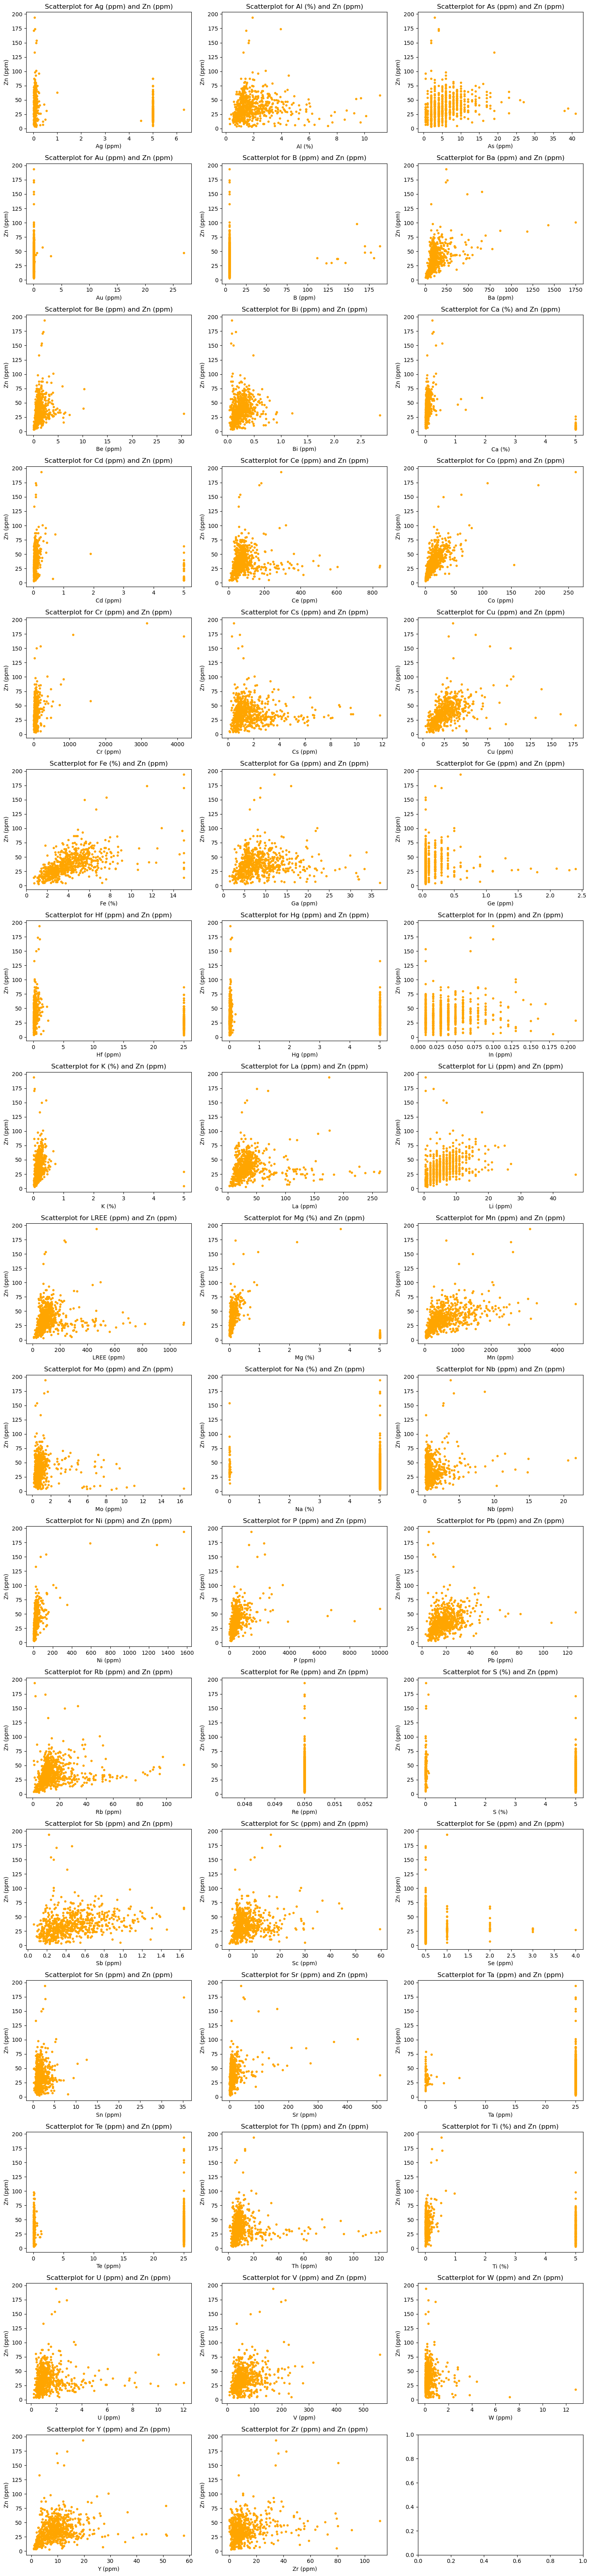

In [21]:
start_time = time.time()
fig, axs = plt.subplots(17, 3, figsize=(15, 5 *13))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Loop through feature names
for i in range(len(feature_names)):
    axs[i].scatter(X[feature_names[i]], y, s = 10, color = 'orange')
    axs[i].set_title(f'Scatterplot for {feature_names[i]} and Zn (ppm)')
    axs[i].set_xlabel(feature_names[i])
    axs[i].set_ylabel('Zn (ppm)')

end_time = time.time()
print("Time taken to plot:", end_time - start_time)
# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:

# Plot histograms for numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [7]:
numeric_columns.describe()

,Ag (ppm),Al (%),As (ppm),Au (ppm),B (ppm),Ba (ppm),Be (ppm),Bi (ppm),Ca (%),Cd (ppm),...,Ta (ppm),Te (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,...,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,1.539746,1.984654,5.782087,0.096121,7.495063,126.694640,1.354443,0.258166,0.288166,0.256276,...,22.602257,15.349901,11.531312,1.381001,1.431227,66.693935,0.369041,9.807955,37.609309,11.836671
std,2.257801,1.448399,4.563129,1.016514,19.285443,133.159244,1.537795,0.177348,0.998065,0.949150,...,7.311806,12.131930,14.197642,2.184772,1.341452,47.287505,0.712671,6.568492,20.887808,13.266331
min,0.010000,0.270000,0.500000,0.050000,5.000000,2.500000,0.050000,0.040000,0.010000,0.010000,...,0.050000,0.050000,0.900000,0.010000,0.210000,9.000000,0.050000,0.880000,3.000000,0.250000
25%,0.050000,1.100000,3.000000,0.050000,5.000000,68.000000,0.700000,0.150000,0.040000,0.030000,...,25.000000,0.100000,5.700000,0.020000,0.770000,38.000000,0.100000,5.640000,25.000000,4.600000
50%,0.080000,1.540000,5.000000,0.050000,5.000000,92.000000,1.100000,0.220000,0.060000,0.050000,...,25.000000,25.000000,7.600000,0.060000,1.040000,53.000000,0.200000,8.810000,34.000000,7.800000
75%,5.000000,2.370000,8.000000,0.050000,5.000000,137.000000,1.500000,0.320000,0.090000,0.080000,...,25.000000,25.000000,10.700000,5.000000,1.530000,81.000000,0.400000,12.090000,47.000000,13.100000
max,6.300000,11.090000,41.000000,26.900000,188.000000,1750.000000,30.500000,2.850000,5.000000,5.000000,...,25.000000,25.000000,120.700000,5.000000,12.020000,559.000000,12.800000,57.900000,194.000000,111.000000


In [8]:
all_column_names = numeric_columns.columns.tolist()
len(all_column_names)


51

In [15]:
feature_names = [col for col in all_column_names if col != "Zn (ppm)"]
targer_name = "Zn (ppm)"
# Set X and y variables
X = numeric_columns[feature_names]
y = numeric_columns["Zn (ppm)"]

# Print feature names, X, and y
print("Feature Names:", feature_names)
print("\nX Variable (Features):")
print(X.head())
print("\ny Variable (Target):", targer_name)
print(y.head())

Feature Names: ['Ag (ppm)', 'Al (%)', 'As (ppm)', 'Au (ppm)', 'B (ppm)', 'Ba (ppm)', 'Be (ppm)', 'Bi (ppm)', 'Ca (%)', 'Cd (ppm)', 'Ce (ppm)', 'Co (ppm)', 'Cr (ppm)', 'Cs (ppm)', 'Cu (ppm)', 'Fe (%)', 'Ga (ppm)', 'Ge (ppm)', 'Hf (ppm)', 'Hg (ppm)', 'In (ppm)', 'K (%)', 'La (ppm)', 'Li (ppm)', 'LREE (ppm)', 'Mg (%)', 'Mn (ppm)', 'Mo (ppm)', 'Na (%)', 'Nb (ppm)', 'Ni (ppm)', 'P (ppm)', 'Pb (ppm)', 'Rb (ppm)', 'Re (ppm)', 'S (%)', 'Sb (ppm)', 'Sc (ppm)', 'Se (ppm)', 'Sn (ppm)', 'Sr (ppm)', 'Ta (ppm)', 'Te (ppm)', 'Th (ppm)', 'Ti (%)', 'U (ppm)', 'V (ppm)', 'W (ppm)', 'Y (ppm)', 'Zr (ppm)']

X Variable (Features):
   Ag (ppm)  Al (%)  As (ppm)  Au (ppm)  B (ppm)  Ba (ppm)  Be (ppm)  \
0      0.03    2.63       4.0      0.05        5      76.0       1.0   
1      0.02    1.93       2.0      0.05        5      84.0       1.7   
2      0.04    1.47       3.0      0.05        5      70.0       0.7   
3      0.05    1.72      23.0      0.05        5      80.0       1.1   
4      0.04    0.97   

## 3. Statistical Exploration


### 3.1 Descriptive Statistical Analysis
Conduct a descriptive statistical analysis of the dataset.


c:\Users\kizar\miniconda3\envs\ml_class_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kizar\miniconda3\envs\ml_class_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kizar\miniconda3\envs\ml_class_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kizar\miniconda3\envs\ml_class_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

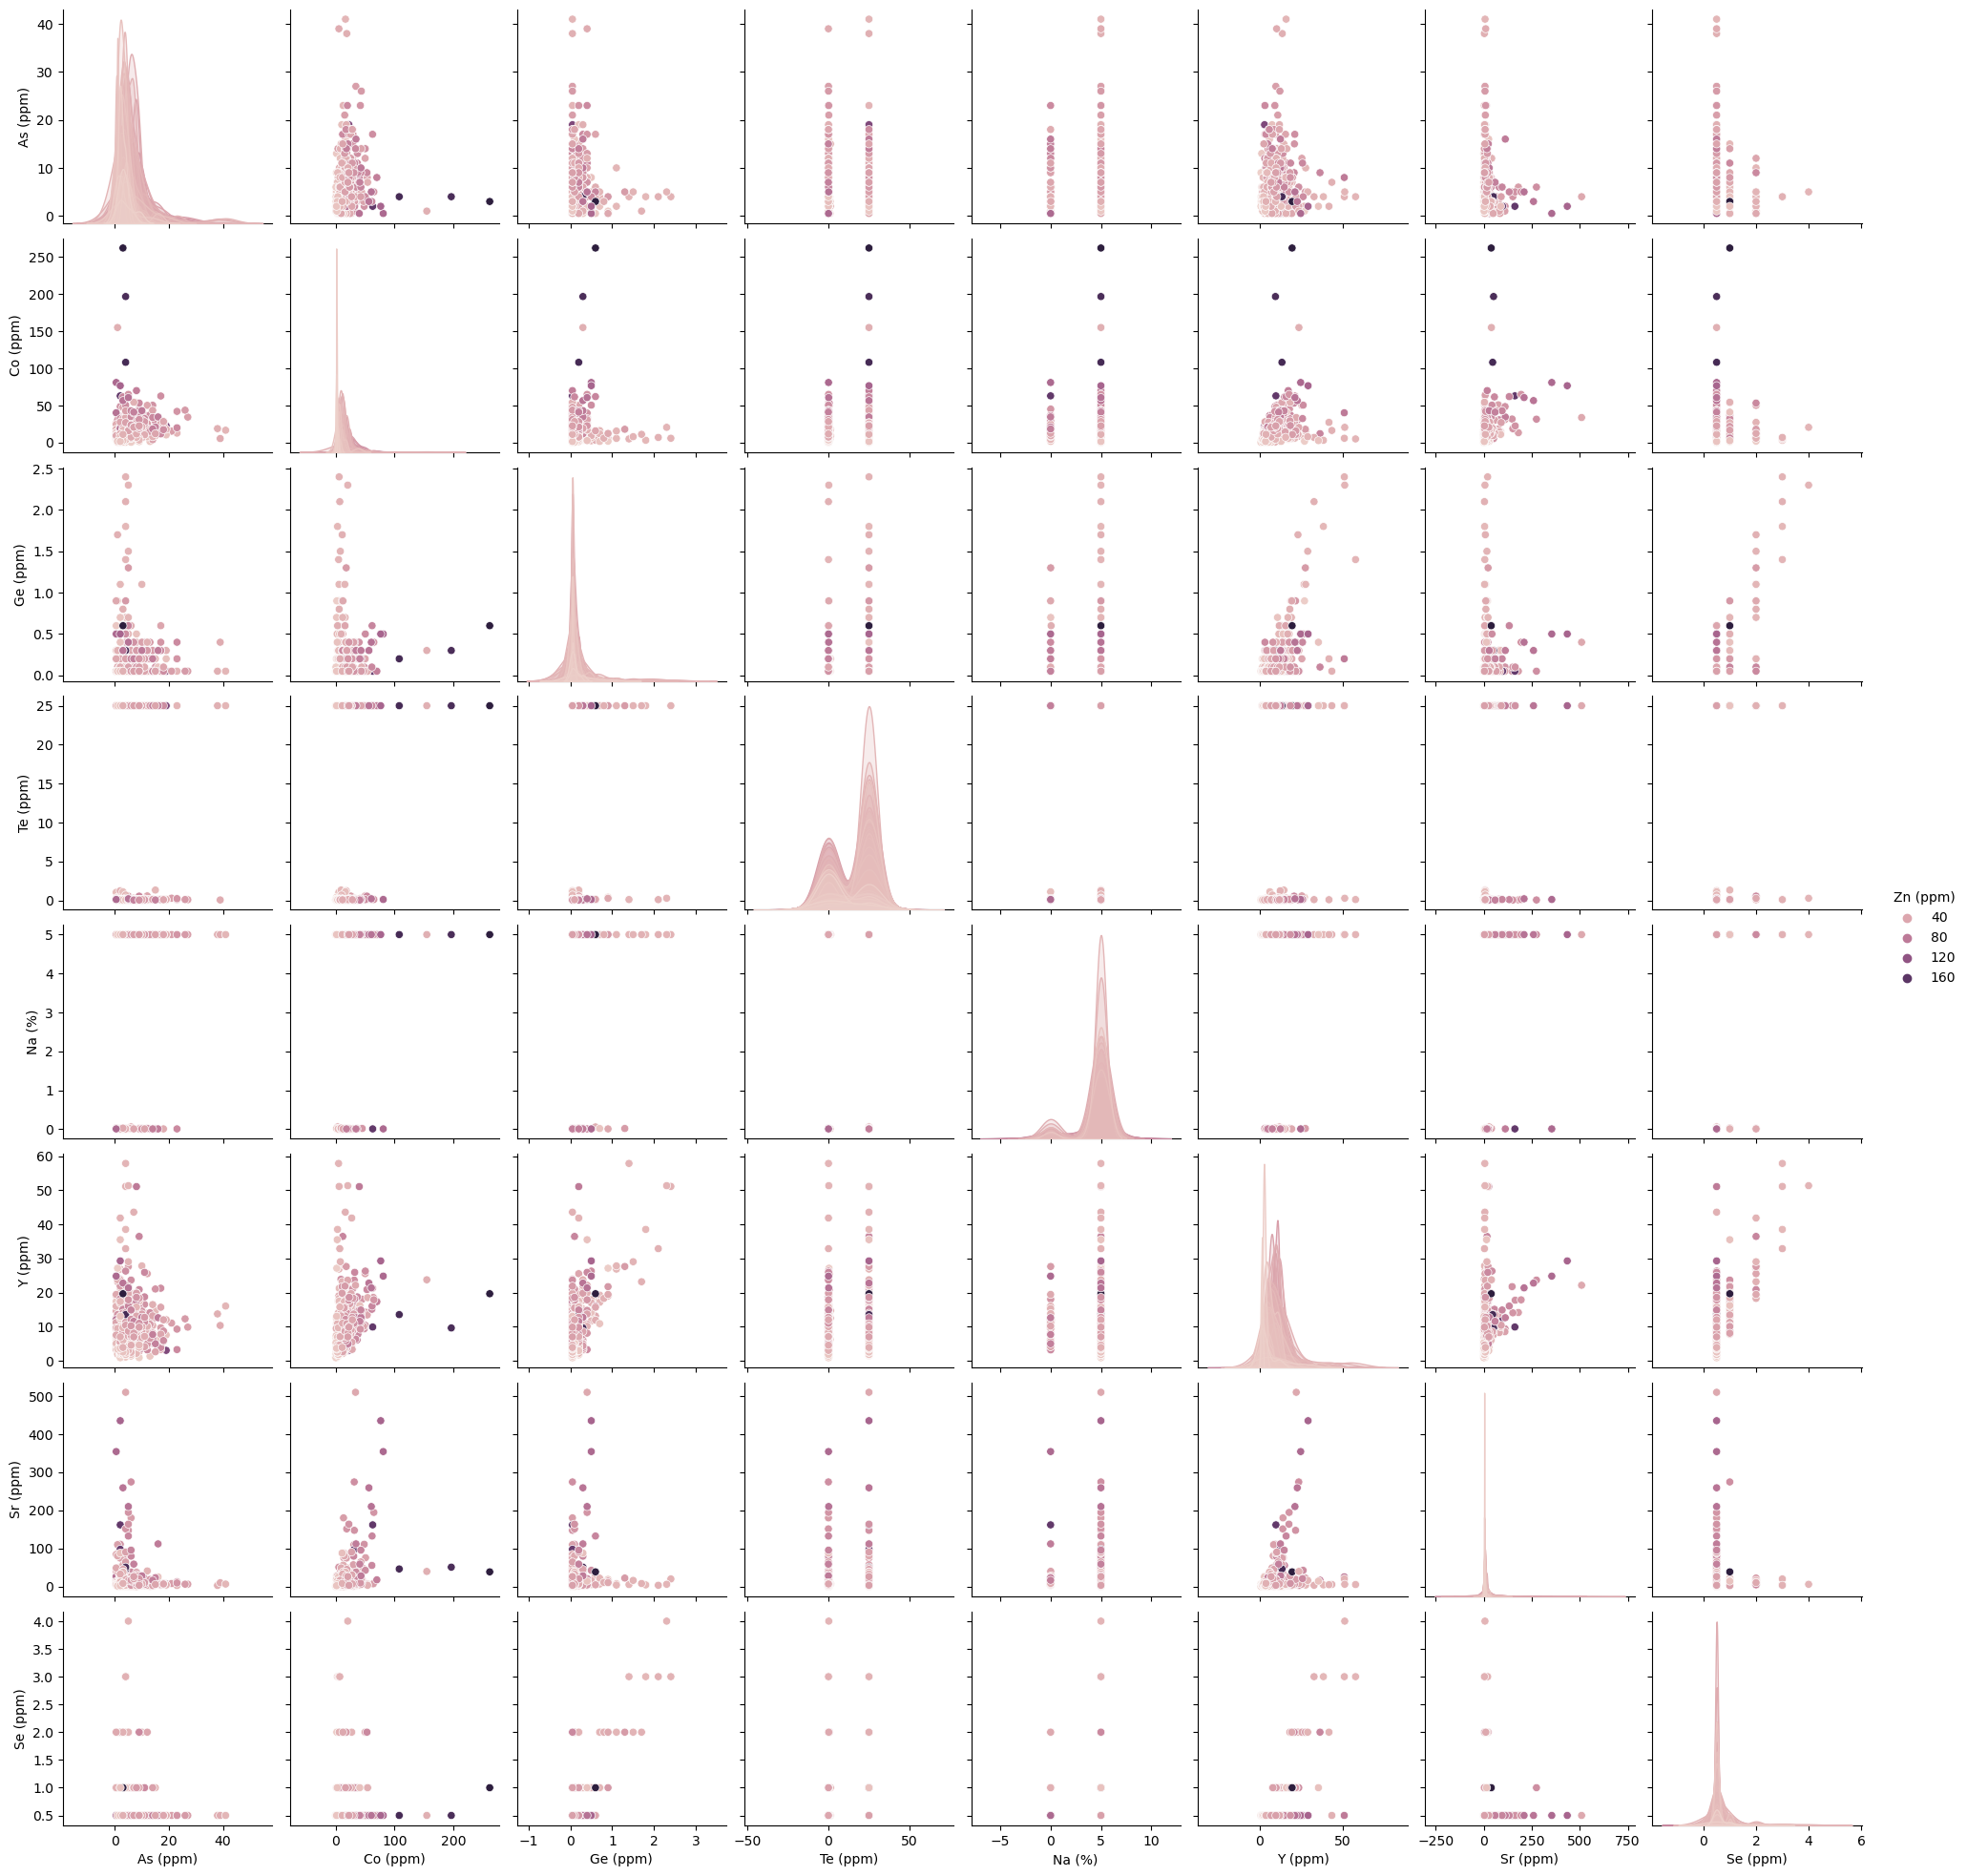

In [11]:

selected_variables = numeric_columns.sample(8, axis=1)

# Concatenate the target variable with the selected variables for visualization
data_to_plot = pd.concat([numeric_columns['Zn (ppm)'], selected_variables], axis=1)

# Create a pairplot
sns.pairplot(data_to_plot, diag_kind='kde', markers='o', hue='Zn (ppm)')

# Show the plot
plt.show()



### 3.2 Correlation Analysis
Determine the potential correlation between variables and comment on its implications for machine learning.


"Determine the potential correlation between the variables" refers to analyzing the degree to which two or more variables change together. Correlation is a statistical measure that indicates the extent to which two variables tend to move in relation to each other. It can help you understand the relationships between different features in your dataset.

Here's a brief explanation:

- **Correlation Coefficient:** It is a numerical value that ranges from -1 to 1. 
  - A coefficient of 1 implies a perfect positive correlation (as one variable increases, the other also increases).
  - A coefficient of -1 implies a perfect negative correlation (as one variable increases, the other decreases).
  - A coefficient of 0 implies no correlation.

- **Correlation Matrix:** A correlation matrix is a table that shows the correlation coefficients between many variables. Each cell in the table shows the correlation between two variables. You can use visualization techniques like heatmaps for a better understanding.

**Implications in Machine Learning:**

1. **Feature Selection:** Highly correlated features may not provide much additional information. In some cases, you might consider removing one of the highly correlated features to avoid multicollinearity.

2. **Model Performance:** If features are strongly correlated with the target variable, they might have a stronger impact on predicting the target variable. On the other hand, if features are highly correlated with each other, it might lead to redundancy.

3. **Assumptions of Linear Models:** Linear regression models assume that features are not highly correlated. If features are highly correlated, it can affect the interpretability of coefficients.

4. **Dimensionality Reduction:** Understanding correlation can be crucial in dimensionality reduction techniques like Principal Component Analysis (PCA). Highly correlated features might be capturing similar information, and PCA can help in reducing redundancy.

5. **Interpretability:** Correlation analysis can provide insights into the relationships between different variables, which might be valuable for understanding the problem domain.

In summary, analyzing the correlation between variables is an essential step in the data exploration process. It helps you make informed decisions about feature engineering, model selection, and overall model performance.


### 3.3 Pre-processing
Introduce potential pre-processing steps (e.g., handling outliers, missing values, normalization).

In [12]:
# Code for statistical analysis and pre-processing


## 4. Evaluation Protocol


### 4.1 Dataset Splitting
Explain how you will split the dataset into training and testing data to avoid data leakage.

### 4.2 Evaluation Metrics
Present the main evaluation metric and any additional metrics for model comparison.
The idea here is that the model has never seen the test data before, so it’s considered an accurate metric of how your model would perform on new data

In geochemistry analysis, one of the main components of general error in exploration operations is laboratory error, and obtaining this error is important to know the precision of the analysis. Since, in regional-scale geochemical projects, the goal is to measure the relative values of each element corresponding to each other for finding promising areas, hence the precision of measurements is more important than their accuracy.